
# Spotify

## Trabajo Final

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("hits.csv")


In [3]:
df.columns

Index(['Unnamed: 0', 'track', 'artist', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'chorus_hit', 'sections', 'target'],
      dtype='object')

In [4]:
df.shape

(41106, 20)

In [5]:
#df_subset = df.sample(100)
#df.drop(df_subset.index,inplace=True)
#df_subset.to_csv(r'seleccion_canciones.csv', index = False) 

In [6]:
df.shape

(41106, 20)

In [7]:
df['target'].value_counts()

1    20553
0    20553
Name: target, dtype: int64

In [8]:
df.head(10)

Unnamed: 0                      track             artist  \
0           0                  Lucky Man  Montgomery Gentry   
1           1             On The Hotline       Pretty Ricky   
2           2         Clouds Of Dementia         Candlemass   
3           3   Heavy Metal, Raise Hell!      Zwartketterij   
4           4            I Got A Feelin'   Billy Currington   
5           5            Dantzig Station       State Of Art   
6           6                   Divorced        Blacklisted   
7           7          Where I Come From       Alan Jackson   
8           8         Nothin' To Die For         Tim McGraw   
9           9  I Want to Know Your Plans       Say Anything   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:4GiXBCUF7H6YfNQsnBRIzl         0.578   0.471    4    -7.270   
1  spotify:track:1zyqZONW985Cs4osz9wlsu         0.704   0.854   10    -5.477   
2  spotify:track:6cHZf7RbxXCKwEkgAZT4mY         0.162   0.836    9    -3.009   
3  spotify:track:2IjBPp2vMeX7LggzRN3iSX         0.188   0.994    4    -3.745   
4  spotify:track:1tF370eYXUcWwkIvaq3IGz         0.630   0.764    2    -4.353   
5  spotify:track:5Z3nrC0JbJmXaOGiXTuNFk         0.726   0.837   11    -7.223   
6  spotify:track:0iAdSLiQBIizTAiLUP7p5E         0.365   0.922    1    -2.644   
7  spotify:track:6ej1QJ8eIYmhsyTlvgDajy         0.726   0.631   11    -8.136   
8  spotify:track:3lRSz6HujrSy9b3LXg2Kq9         0.481   0.786   10    -5.654   
9  spotify:track:3pjnCLIHbRczUjenWOEo56         0.647   0.324    7    -9.679   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0289      0.368000           0.00000    0.1590    0.532   
1     0       0.1830      0.018500           0.00000    0.1480    0.688   
2     1       0.0473      0.000111           0.00457    0.1740    0.300   
3     1       0.1660      0.000007           0.07840    0.1920    0.333   
4     1       0.0275      0.363000           0.00000    0.1250    0.631   
5     0       0.0965      0.373000           0.26800    0.1360    0.969   
6     1       0.0710      0.002850           0.00000    0.3210    0.290   
7     0       0.0334      0.220000           0.00000    0.1930    0.746   
8     1       0.0288      0.053800           0.00000    0.0759    0.389   
9     1       0.0377      0.354000           0.00000    0.1150    0.344   

     tempo  duration_ms  time_signature  chorus_hit  sections  target  
0  133.061       196707               4    30.88059        13       1  
1   92.988       242587               4    41.51106        10       1  
2   86.964       338893               4    65.32887        13       0  
3  148.440       255667               4    58.59528         9       0  
4  112.098       193760               4    22.62384        10       1  
5  135.347       192720               4    28.29051        10       0  
6   77.250        89427               4    45.77202         4       0  
7  124.711       239240               4    35.59732        10       1  
8  153.105       253640               4    19.65701        11       1  
9  124.213       314286               3    32.66343        16       0

In [9]:
df.artist.value_counts()

Traditional                      207
Harry Belafonte                  140
P. Susheela                      130
Ennio Morricone                  128
Jerry Goldsmith                  124
                                ... 
The Intrigues                      1
Ben Frost                          1
Charly Lownoise & Mental Theo      1
Adriana Calcanhotto                1
The Holidays                       1
Name: artist, Length: 11904, dtype: int64

In [10]:
df[df.artist=='The Killers']

Unnamed: 0                            track       artist  \
539           539                   Mr. Brightside  The Killers   
740           740              When You Were Young  The Killers   
1177         1177                 Somebody Told Me  The Killers   
2508         2508                     Read My Mind  The Killers   
2682         2682  All These Things That I've Done  The Killers   
2781         2781                            Human  The Killers   
3048         3048                       Shadowplay  The Killers   
10257        4385                         Runaways  The Killers   

                                        uri  danceability  energy  key  \
539    spotify:track:7oK9VyNzrYvRFo7nQEYkWN         0.356   0.924    1   
740    spotify:track:70wYA8oYHoMzhRRkARoMhU         0.467   0.988   11   
1177   spotify:track:7HGTkn2aX7MNdKs7nV2xBt         0.509   0.987   10   
2508   spotify:track:7cX4PJz1old9fyFI8RlfgW         0.543   0.917    1   
2682   spotify:track:0kYUrLVQOfx21xuXu7OGrT         0.557   0.728    6   
2781   spotify:track:1sTsuZTdANkiFd7T34H3nb         0.557   0.800   10   
3048   spotify:track:6HbTF52swZiGSJ2cvAJ7PU         0.642   0.805    2   
10257  spotify:track:62BxlOvQCjLNQA5ARA4Dug         0.414   0.837    1   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
539      -3.740     1       0.0808      0.001010          0.000000    0.0953   
740      -3.313     1       0.1120      0.000152          0.048400    0.2800   
1177     -3.198     0       0.0886      0.000081          0.000928    0.1190   
2508     -3.391     1       0.0444      0.005720          0.000078    0.1040   
2682     -6.181     1       0.0405      0.001560          0.000005    0.1180   
2781     -8.477     1       0.0601      0.001320          0.001200    0.0906   
3048     -7.238     1       0.0476      0.000781          0.579000    0.3930   
10257    -4.043     1       0.0407      0.001140          0.006930    0.0855   

       valence    tempo  duration_ms  time_signature  chorus_hit  sections  \
539      0.232  148.017       222587               4    32.67887         8   
740      0.321  130.435       220427               4    20.00940         7   
1177     0.647  138.039       197160               4    21.18129        10   
2508     0.329  132.246       246840               4    32.85281        11   
2682     0.216  118.241       301573               4    26.66681        14   
2781     0.582  135.470       245373               4    32.48759        12   
3048     0.352  145.029       247240               4    30.31609        11   
10257    0.199  121.749       243787               4    28.75236        11   

       target  
539         1  
740         1  
1177        1  
2508        1  
2682        1  
2781        1  
3048        1  
10257       1

In [11]:
#df.to_csv('hits.csv')

In [12]:
df.columns

Index(['Unnamed: 0', 'track', 'artist', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'chorus_hit', 'sections', 'target'],
      dtype='object')

In [13]:
y = df['target']
X = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']]

# MODELOS DE CLASIFICACION

## KNN

In [14]:
#KNN

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=12)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

pipeline1 = Pipeline((
    ('clf', KNeighborsClassifier()),
    ))
    
parameters1 = {
    'clf__n_neighbors': np.linspace(1,25,1).astype(int),
    'clf__weights': ['uniform', 'distance']
     }

gs1 = GridSearchCV (pipeline1, parameters1, cv=5, scoring='recall', n_jobs = 2 , verbose = 0)

gs1.fit(X_train_sc, y_train)

print("Best score: %0.3f" % gs1.best_score_) 
print("Best parameters set:" )
best_parameters = gs1.best_estimator_.get_params()
for param_name in sorted (parameters1 . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name]))
        
y_pred = gs1.predict(X_test_sc)

print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("matriz: ", confusion_matrix(y_test, y_pred))


Best score: 0.733
Best parameters set:
	 clf__n_neighbors: 1
	 clf__weights: 'uniform'
              precision    recall  f1-score   support

           0       0.71      0.66      0.69      5138
           1       0.68      0.74      0.71      5139

    accuracy                           0.70     10277
   macro avg       0.70      0.70      0.70     10277
weighted avg       0.70      0.70      0.70     10277

accuracy:  0.6981609419091175
Recall 0.735357073360576
matriz:  [[3396 1742]
 [1360 3779]]


In [15]:
# Obtenemos la matriz de confusión
confusion_matrix(y_test, y_pred)

array([[3396, 1742],
       [1360, 3779]])

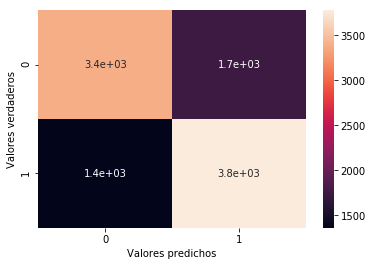

In [16]:
# Graficamos la matriz de confusión para visualizarla mejor
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Valores verdaderos')
plt.xlabel('Valores predichos');

In [17]:
ok = (y_test == y_pred).sum()
ok

7175

In [18]:
ok = (y_test != y_pred).sum()
ok

3102

In [19]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [20]:
# Guardamos todo en un dataframe
df_Results = pd.DataFrame(columns = ["Model", "Accu","Recall","ROC","TP","FN"])
df_Results.loc[0, "Model"] = "KNN 1 Vec"
df_Results.loc[0, "Accu"] = accuracy_score(y_test, y_pred)
df_Results.loc[0, "Recall"] = recall_score(y_test, y_pred)
df_Results.loc[0, "ROC"] = "-"
df_Results.loc[0, "TP"] = TP
df_Results.loc[0, "FN"] = FN

df_Results.head()

Model      Accu    Recall ROC    TP    FN
0  KNN 1 Vec  0.698161  0.735357   -  3779  1360

## REGRESION LOGISTICA

In [21]:
from sklearn import linear_model

In [22]:
y = df['target']
X = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']]

In [23]:
from sklearn.preprocessing import StandardScaler, binarize
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=12)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

pipeline3 = Pipeline((
   ('log', LogisticRegression()),
    ))
    
parameters3 = {
    'log__penalty': ['l1', 'l2'],
    'log__C': [0.01, 0.1, 1, 10, 100],
     }

gs3 = GridSearchCV (pipeline3, parameters3, cv=5, scoring='recall', n_jobs = 2 , verbose = 0)

gs3.fit(X_train_sc, y_train)

print("Best score: %0.3f" % gs3. best_score_) 
print("Best parameters set:" )
best_parameters3 = gs3.best_estimator_.get_params()
for param_name3 in sorted (parameters3 . keys()): 
                    print("\t %s: %r" % (param_name3, best_parameters3[param_name3])) 
        
y_pred = gs3.predict(X_test_sc)

print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("matriz: ", confusion_matrix(y_test, y_pred))
print('ROC', roc_auc_score(y_test, y_pred))


Best score: 0.822
Best parameters set:
	 log__C: 0.01
	 log__penalty: 'l1'
              precision    recall  f1-score   support

           0       0.77      0.63      0.70      5138
           1       0.69      0.81      0.75      5139

    accuracy                           0.72     10277
   macro avg       0.73      0.72      0.72     10277
weighted avg       0.73      0.72      0.72     10277

accuracy:  0.723752067724044
Recall: 0.8145553609651683
matriz:  [[3252 1886]
 [ 953 4186]]
ROC 0.7237432312805601


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
confusion_matrix(y_test, y_pred)

array([[3252, 1886],
       [ 953, 4186]])

In [25]:
##LOG MODEL CON STATS

In [26]:
import statsmodels.api as sm
from scipy import stats

In [27]:
X_train_stats = sm.add_constant(X_train_sc)

In [28]:
logit = sm.Logit(y_train, X_train_stats)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.526141
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                30829
Model:                          Logit   Df Residuals:                    30813
Method:                           MLE   Df Model:                           15
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:                  0.2409
Time:                        09:34:41   Log-Likelihood:                -16220.
converged:                       True   LL-Null:                       -21369.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2424      0.016    -15.593      0.000      -0.273      -0.212
x1             0.5924      0.

In [29]:
X_test_stats = sm.add_constant(X_test_sc)

In [30]:
y_pred_stats = result.predict(X_test_stats) > 0.5
confusion_matrix(y_test, y_pred_stats)

array([[3303, 1835],
       [ 974, 4165]])

In [31]:
accuracy_score(y_test, y_pred_stats)

0.7266712075508417

In [32]:
# Se descartan los p values < 0,05 (duration) y se vuelve a estimar el modelo con model stats
y = df['target']
X = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=12)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [35]:
X_train_stats = sm.add_constant(X_train_sc)
logit = sm.Logit(y_train, X_train_stats)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.526590
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                30829
Model:                          Logit   Df Residuals:                    30815
Method:                           MLE   Df Model:                           13
Date:                Mon, 13 Jul 2020   Pseudo R-squ.:                  0.2403
Time:                        09:34:41   Log-Likelihood:                -16234.
converged:                       True   LL-Null:                       -21369.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2414      0.016    -15.531      0.000      -0.272      -0.211
x1             0.5856      0.

In [36]:
X_test_stats = sm.add_constant(X_test_sc)
y_pred_stats = result.predict(X_test_stats) > 0.5
confusion_matrix(y_test, y_pred_stats)

array([[3294, 1844],
       [ 979, 4160]])

In [37]:
accuracy_score(y_test, y_pred_stats)

0.7253089422983361

In [38]:
# Se vuelve a correr el modelo logistico con menos features

#Features
y = df['target']
X = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=12)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

pipeline3 = Pipeline((
   ('log', LogisticRegression()),
    ))
    
parameters3 = {
    'log__penalty': ['l1', 'l2'],
    'log__C': [0.01, 0.1, 1, 10, 100],
     }

gs3 = GridSearchCV (pipeline3, parameters3, cv=5, scoring='recall', n_jobs = 2 , verbose = 0)

gs3.fit(X_train_sc, y_train)

print("Best score: %0.3f" % gs3. best_score_) 
print("Best parameters set:" )
best_parameters3 = gs3.best_estimator_.get_params()
for param_name3 in sorted (parameters3 . keys()): 
                    print("\t %s: %r" % (param_name3, best_parameters3[param_name3])) 
        
y_pred = gs3.predict(X_test_sc)

print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("matriz: ", confusion_matrix(y_test, y_pred))
print('ROC', roc_auc_score(y_test, y_pred))

Best score: 0.822
Best parameters set:
	 log__C: 0.01
	 log__penalty: 'l1'
              precision    recall  f1-score   support

           0       0.77      0.63      0.70      5138
           1       0.69      0.82      0.75      5139

    accuracy                           0.72     10277
   macro avg       0.73      0.72      0.72     10277
weighted avg       0.73      0.72      0.72     10277

accuracy:  0.7239466770458305
Recall: 0.8159174936758125
matriz:  [[3247 1891]
 [ 946 4193]]
ROC 0.7239377269858237


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
confusion_matrix(y_test, y_pred)

array([[3247, 1891],
       [ 946, 4193]])

In [40]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [41]:
# Guardamos todo en un dataframe
df_Results.loc[1, "Model"] = "Reg Log"
df_Results.loc[1, "Accu"] = accuracy_score(y_test, y_pred)
df_Results.loc[1, "Recall"] = recall_score(y_test, y_pred)
df_Results.loc[1, "ROC"] = roc_auc_score(y_test, y_pred)
df_Results.loc[1, "TP"] = TP
df_Results.loc[1, "FN"] = FN

df_Results

Model      Accu    Recall       ROC    TP    FN
0  KNN 1 Vec  0.698161  0.735357         -  3779  1360
1    Reg Log  0.723947  0.815917  0.723938  4193   946

## NAIVE BAYES

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
y = df['target']
X = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=12)

In [45]:
# Instanciacion
modelo_NB = GaussianNB()

# Fiteo
modelo_NB.fit(X_train, y_train)

# Predicción
y_pred = modelo_NB.predict(X_test)

In [46]:
# Matriz de Confusion
confusion_matrix(y_test, y_pred)

array([[2882, 2256],
       [ 787, 4352]])

In [47]:
(y_test != y_pred).sum()

3043

In [48]:
(y_test == y_pred).sum()

7234

In [49]:
print("accuracy: ",accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print('ROC', roc_auc_score(y_test, y_pred))

accuracy:  0.7039019169018196
Recall: 0.8468573652461568
ROC 0.7038880053167336


In [50]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [51]:
# Guardamos todo en un dataframe
df_Results.loc[2, "Model"] = "G NB"
df_Results.loc[2, "Accu"] = accuracy_score(y_test, y_pred)
df_Results.loc[2, "Recall"] =recall_score(y_test, y_pred)
df_Results.loc[2, "ROC"] = roc_auc_score(y_test, y_pred)
df_Results.loc[2, "TP"] = TP
df_Results.loc[2, "FN"] = FN

df_Results

Model      Accu    Recall       ROC    TP    FN
0  KNN 1 Vec  0.698161  0.735357         -  3779  1360
1    Reg Log  0.723947  0.815917  0.723938  4193   946
2       G NB  0.703902  0.846857  0.703888  4352   787

## ARBOL DE DECISION

In [52]:
y = df['target']
X = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=12)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

kf = StratifiedKFold(n_splits=3, shuffle=True)


parameters4 = {#'max_features' : [1, 5, 10, 15, 20],
              'max_depth': [1,2,3,4,5,6,7], 
              'max_leaf_nodes' : [5,10,15,20,30], 
              'min_samples_leaf' : [1,2,3,4,5,10,15,20],
              'min_samples_split' : [5,6,7,8,9,10,20]}

#Se hace la búsqueda con Grid Search
model = DecisionTreeClassifier(random_state=42)
gs4 = GridSearchCV(model, parameters4, scoring='recall', cv=kf, verbose=1 , n_jobs=-1)
gs4.fit(X_train, y_train)

print("Best score: %0.3f" % gs4.best_score_) 
print("Best parameters set:" )
best_parameters4 = gs4.best_estimator_.get_params()
for param_name4 in sorted (parameters4 . keys()): 
                    print("\t %s: %r" % (param_name4, best_parameters4[param_name4]))
        
y_pred = gs4.predict(X_test)

print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print ("\n")
print("matriz: ", confusion_matrix(y_test, y_pred))
print ("\n")
print("Recall", recall_score(y_test, y_pred))
print ("\n")
print('ROC', roc_auc_score(y_test, y_pred))

Fitting 3 folds for each of 1960 candidates, totalling 5880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 1744 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 3144 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4944 tasks      | elapsed:  2.3min


Best score: 0.917
Best parameters set:
	 max_depth: 1
	 max_leaf_nodes: 5
	 min_samples_leaf: 1
	 min_samples_split: 5
              precision    recall  f1-score   support

           0       0.83      0.45      0.58      5138
           1       0.62      0.91      0.74      5139

    accuracy                           0.68     10277
   macro avg       0.73      0.68      0.66     10277
weighted avg       0.73      0.68      0.66     10277

accuracy:  0.6777269631215336


matriz:  [[2291 2847]
 [ 465 4674]]


Recall 0.9095154699357851


ROC 0.6777044068246463


[Parallel(n_jobs=-1)]: Done 5880 out of 5880 | elapsed:  3.0min finished


In [53]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [54]:
# Guardamos todo en un dataframe
df_Results.loc[3, "Model"] = "ARB DEC"
df_Results.loc[3, "Accu"] = accuracy_score(y_test, y_pred)
df_Results.loc[3, "Recall"] =recall_score(y_test, y_pred)
df_Results.loc[3, "ROC"] = roc_auc_score(y_test, y_pred)
df_Results.loc[3, "TP"] = TP
df_Results.loc[3, "FN"] = FN

df_Results

Model      Accu    Recall       ROC    TP    FN
0  KNN 1 Vec  0.698161  0.735357         -  3779  1360
1    Reg Log  0.723947  0.815917  0.723938  4193   946
2       G NB  0.703902  0.846857  0.703888  4352   787
3    ARB DEC  0.677727  0.909515  0.677704  4674   465

## RANDOM FOREST (BAGGING: ENSAMBLE DE ARBOLES)

In [55]:
# Ensambble

y = df['target']
X = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=12)

from sklearn.ensemble import BaggingClassifier

kf = StratifiedKFold(n_splits=5, shuffle=True)

parameters5 = {"base_estimator__max_depth": [3,5,None],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 5],
          "base_estimator__min_samples_split": [2, 5],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 1.0],
          'max_samples': [0.5, 1.0],
          'n_estimators': [2, 5],
         }

model = BaggingClassifier(DecisionTreeClassifier(random_state=42))

gs5 = RandomizedSearchCV(model, parameters5, scoring='recall', n_jobs=3, cv=kf)
gs5.fit(X_train, y_train)

print("Best score: %0.3f" % gs5.best_score_) 
print("Best parameters set:" )
best_parameters5 = gs5.best_estimator_.get_params()
for param_name5 in sorted (parameters5 . keys()): 
                    print("\t %s: %r" % (param_name5, best_parameters5[param_name5]))
        
y_pred = gs5.predict(X_test)

print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print ("\n")
print("matriz: ", confusion_matrix(y_test, y_pred))
print ("\n")
print("Recall", recall_score(y_test, y_pred))
print ("\n")
print('ROC', roc_auc_score(y_test, y_pred))

Best score: 0.864
Best parameters set:
	 base_estimator__max_depth: 5
	 base_estimator__max_features: None
	 base_estimator__min_samples_leaf: 5
	 base_estimator__min_samples_split: 2
	 bootstrap_features: False
	 max_features: 0.5
	 max_samples: 0.5
	 n_estimators: 5
              precision    recall  f1-score   support

           0       0.81      0.64      0.72      5138
           1       0.71      0.85      0.77      5139

    accuracy                           0.75     10277
   macro avg       0.76      0.75      0.75     10277
weighted avg       0.76      0.75      0.75     10277

accuracy:  0.7481755376082514


matriz:  [[3305 1833]
 [ 755 4384]]


Recall 0.8530842576376727


ROC 0.7481653285074311


In [56]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Guardamos todo en un dataframe
df_Results.loc[4, "Model"] = "R FOREST"
df_Results.loc[4, "Accu"] = accuracy_score(y_test, y_pred)
df_Results.loc[4, "Recall"] =recall_score(y_test, y_pred)
df_Results.loc[4, "ROC"] = roc_auc_score(y_test, y_pred)
df_Results.loc[4, "TP"] = TP
df_Results.loc[4, "FN"] = FN

df_Results

Model      Accu    Recall       ROC    TP    FN
0  KNN 1 Vec  0.698161  0.735357         -  3779  1360
1    Reg Log  0.723947  0.815917  0.723938  4193   946
2       G NB  0.703902  0.846857  0.703888  4352   787
3    ARB DEC  0.677727  0.909515  0.677704  4674   465
4   R FOREST  0.748176  0.853084  0.748165  4384   755

## XGBOOST

In [57]:
# XGBOOST

y = df['target']
X = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=12)

from xgboost.sklearn import XGBClassifier
import scipy.stats as st
from sklearn.model_selection import RandomizedSearchCV

model_xg = XGBClassifier(random_state=42,n_jobs=-1)

one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

parameters6 = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)

    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

xgb = RandomizedSearchCV(model_xg,parameters6, scoring='recall', n_iter=25, verbose= True)

xgb.fit(X_train, y_train)

print("Best score: %0.3f" % xgb.best_score_) 
print("Best parameters set:" )
best_parameters6 = xgb.best_estimator_.get_params()
for param_name6 in sorted (parameters6 . keys()): 
                    print("\t %s: %r" % (param_name6, best_parameters6[param_name6]))
        
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print ("\n")
print("matriz: ", confusion_matrix(y_test, y_pred))
print ("\n")
print("Recall", recall_score(y_test, y_pred))
print ("\n")
print('ROC', roc_auc_score(y_test, y_pred))



Fitting 3 folds for each of 25 candidates, totalling 75 fits


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   42.8s finished


Best score: 0.853
Best parameters set:
	 colsample_bytree: 0.9859712610956591
	 gamma: 5.047911392037411
	 learning_rate: 0.1423689444133206
	 max_depth: 4
	 min_child_weight: 9.03839626323877
	 n_estimators: 27
	 reg_alpha: 5.68697732943403
	 subsample: 0.9998242306156883
              precision    recall  f1-score   support

           0       0.81      0.68      0.74      5138
           1       0.72      0.85      0.78      5139

    accuracy                           0.76     10277
   macro avg       0.77      0.76      0.76     10277
weighted avg       0.77      0.76      0.76     10277

accuracy:  0.7622847134377737


matriz:  [[3490 1648]
 [ 795 4344]]


Recall 0.8453006421482778


ROC 0.762276634814894


In [58]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Guardamos todo en un dataframe
df_Results.loc[5, "Model"] = "XGBOOST"
df_Results.loc[5, "Accu"] = accuracy_score(y_test, y_pred)
df_Results.loc[5, "Recall"] =recall_score(y_test, y_pred)
df_Results.loc[5, "ROC"] = roc_auc_score(y_test, y_pred)
df_Results.loc[5, "TP"] = TP
df_Results.loc[5, "FN"] = FN

df_Results

Model      Accu    Recall       ROC    TP    FN
0  KNN 1 Vec  0.698161  0.735357         -  3779  1360
1    Reg Log  0.723947  0.815917  0.723938  4193   946
2       G NB  0.703902  0.846857  0.703888  4352   787
3    ARB DEC  0.677727  0.909515  0.677704  4674   465
4   R FOREST  0.748176  0.853084  0.748165  4384   755
5    XGBOOST  0.762285  0.845301  0.762277  4344   795

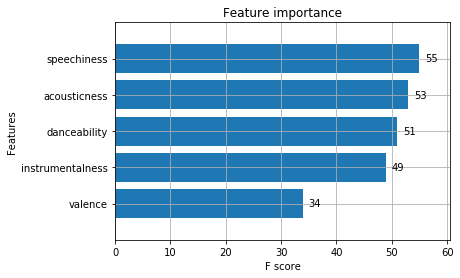

In [59]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=5);

## LIGHTGBM

In [60]:
y = df['target']
X = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=12)

import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(random_state=42)

one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

parameters7 = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)

    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

lgbm = RandomizedSearchCV(model_lgb, parameters7, scoring='recall', n_iter = 25, verbose= True)

lgbm.fit(X_train, y_train)

print("Best score: %0.3f" % lgbm.best_score_) 
print("Best parameters set:" )
best_parameters7 = lgbm.best_estimator_.get_params()
for param_name7 in sorted (parameters7 . keys()): 
                    print("\t %s: %r" % (param_name7, best_parameters7[param_name7]))
        
y_pred = lgbm.predict(X_test)

print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print ("\n")
print("matriz: ", confusion_matrix(y_test, y_pred))
print ("\n")
print("Recall", recall_score(y_test, y_pred))
print ("\n")
print('ROC', roc_auc_score(y_test, y_pred))

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best score: 0.854
Best parameters set:
	 colsample_bytree: 0.910259027647655
	 gamma: 9.787586177864018
	 learning_rate: 0.06442146566812666
	 max_depth: 3
	 min_child_weight: 10.635580230162741
	 n_estimators: 27
	 reg_alpha: 8.581088997048226
	 subsample: 0.9595876619594238
              precision    recall  f1-score   support

           0       0.82      0.65      0.72      5138
           1       0.71      0.86      0.77      5139

    accuracy                           0.75     10277
   macro avg       0.76      0.75      0.75     10277
weighted avg       0.76      0.75      0.75     10277

accuracy:  0.7509973727741559


matriz:  [[3316 1822]
 [ 737 4402]]


Recall 0.8565868846079003


ROC 0.7509870974226734


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    9.0s finished


In [61]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Guardamos todo en un dataframe
df_Results.loc[6, "Model"] = "LIGHTGBM"
df_Results.loc[6, "Accu"] = accuracy_score(y_test, y_pred)
df_Results.loc[6, "Recall"] =recall_score(y_test, y_pred)
df_Results.loc[6, "ROC"] = roc_auc_score(y_test, y_pred)
df_Results.loc[6, "TP"] = TP
df_Results.loc[6, "FN"] = FN

df_Results

Model      Accu    Recall       ROC    TP    FN
0  KNN 1 Vec  0.698161  0.735357         -  3779  1360
1    Reg Log  0.723947  0.815917  0.723938  4193   946
2       G NB  0.703902  0.846857  0.703888  4352   787
3    ARB DEC  0.677727  0.909515  0.677704  4674   465
4   R FOREST  0.748176  0.853084  0.748165  4384   755
5    XGBOOST  0.762285  0.845301  0.762277  4344   795
6   LIGHTGBM  0.750997  0.856587  0.750987  4402   737

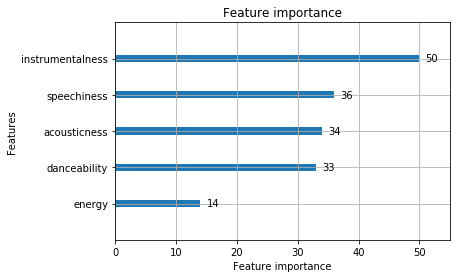

In [62]:
lgb.plot_importance(lgbm.best_estimator_, max_num_features=5);

## CATBOOST

In [63]:
# CATBOOST

y = df['target']
X = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=12)

from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(random_state=42)

model_cat.fit(X_train, y_train)

y_pred = model_cat.predict(X_test)

Learning rate set to 0.044537
0:	learn: 0.6759463	total: 74ms	remaining: 1m 13s
1:	learn: 0.6597722	total: 83.8ms	remaining: 41.8s
2:	learn: 0.6455829	total: 94.7ms	remaining: 31.5s
3:	learn: 0.6315858	total: 107ms	remaining: 26.5s
4:	learn: 0.6194193	total: 118ms	remaining: 23.6s
5:	learn: 0.6089198	total: 131ms	remaining: 21.7s
6:	learn: 0.5989563	total: 142ms	remaining: 20.2s
7:	learn: 0.5903252	total: 155ms	remaining: 19.3s
8:	learn: 0.5816878	total: 167ms	remaining: 18.4s
9:	learn: 0.5746484	total: 179ms	remaining: 17.8s
10:	learn: 0.5678058	total: 192ms	remaining: 17.2s
11:	learn: 0.5619871	total: 208ms	remaining: 17.1s
12:	learn: 0.5566047	total: 217ms	remaining: 16.5s
13:	learn: 0.5514847	total: 228ms	remaining: 16.1s
14:	learn: 0.5463938	total: 240ms	remaining: 15.8s
15:	learn: 0.5417815	total: 252ms	remaining: 15.5s
16:	learn: 0.5375226	total: 264ms	remaining: 15.3s
17:	learn: 0.5338303	total: 276ms	remaining: 15s
18:	learn: 0.5304319	total: 287ms	remaining: 14.8s
19:	learn: 

In [64]:
print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print ("\n")
print("matriz: ", confusion_matrix(y_test, y_pred))
print ("\n")
print("Recall", recall_score(y_test, y_pred))
print ("\n")
print('ROC', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      5138
           1       0.75      0.84      0.79      5139

    accuracy                           0.78     10277
   macro avg       0.78      0.78      0.78     10277
weighted avg       0.78      0.78      0.78     10277

accuracy:  0.7797022477376666


matriz:  [[3707 1431]
 [ 833 4306]]


Recall 0.8379062074333528


ROC 0.7796965836699656


In [65]:
confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Guardamos todo en un dataframe
df_Results.loc[7, "Model"] = "CATBOOST"
df_Results.loc[7, "Accu"] = accuracy_score(y_test, y_pred)
df_Results.loc[7, "Recall"] =recall_score(y_test, y_pred)
df_Results.loc[7, "ROC"] = roc_auc_score(y_test, y_pred)
df_Results.loc[7, "TP"] = TP
df_Results.loc[7, "FN"] = FN

df_Results

Model      Accu    Recall       ROC    TP    FN
0  KNN 1 Vec  0.698161  0.735357         -  3779  1360
1    Reg Log  0.723947  0.815917  0.723938  4193   946
2       G NB  0.703902  0.846857  0.703888  4352   787
3    ARB DEC  0.677727  0.909515  0.677704  4674   465
4   R FOREST  0.748176  0.853084  0.748165  4384   755
5    XGBOOST  0.762285  0.845301  0.762277  4344   795
6   LIGHTGBM  0.750997  0.856587  0.750987  4402   737
7   CATBOOST  0.779702  0.837906  0.779697  4306   833

# IMPORTANCIA LOCAL Y GLOBAL

In [66]:
from sklearn.ensemble import RandomForestClassifier

y = df['target']
X = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit']]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
modelo = RandomForestClassifier(random_state=0).fit(train_X, train_y)

data_for_prediction = X.iloc[0]  
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

import shap  
shap.initjs()

# Create object that can calculate shap values
explainer = shap.TreeExplainer(modelo)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [67]:
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

In [68]:
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

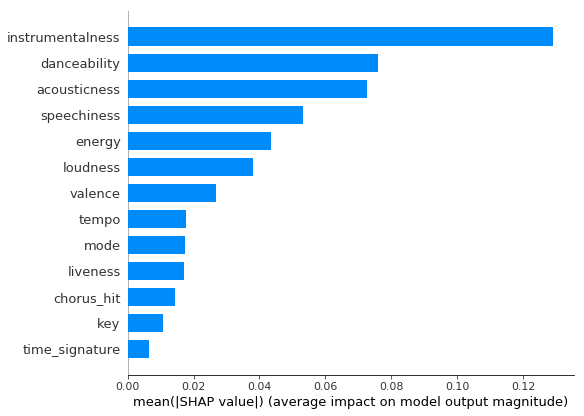

In [69]:
# Global

shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values[1], val_X, plot_type="bar")


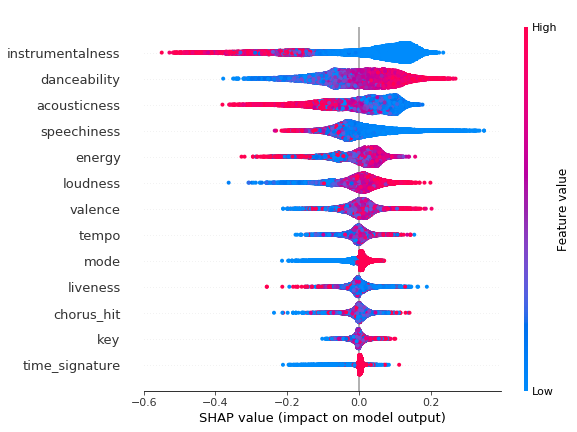

In [70]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X)


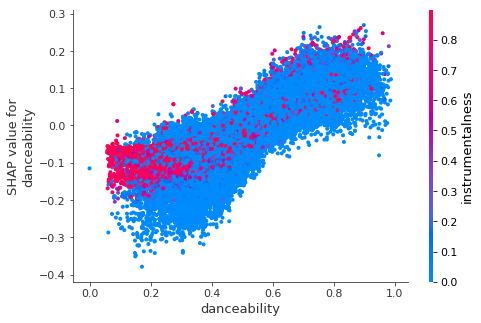

In [71]:
shap.dependence_plot('danceability', shap_values[1], X, interaction_index='instrumentalness')


In [72]:
#shap.force_plot(explainer.expected_value[0], shap_values[0],X)


# TESTEO MODELOS DE CLASIFICACION

In [73]:
#df.sample(n=20).to_csv(r'seleccion_canciones.csv', index = False)


In [74]:
df_prueba = pd.read_csv('seleccion_canciones.csv')


In [75]:
df_prueba.shape


(100, 20)

In [76]:
df_prueba


Unnamed: 0                       track                         artist  \
0         3903                       Pop 7                            GAS   
1         2380                       Sismo             División Minúscula   
2         3611           When I Wanted You                  Barry Manilow   
3         2659     Femina ridens - Cantata               Stelvio Cipriani   
4         5532                     My Girl                    Donnie Iris   
..         ...                         ...                            ...   
95        3286           I Did It For Love                   Night Ranger   
96        5158            Going In Circles     The Friends Of Distinction   
97        1266                Stumblin' In     Suzi Quatro & Chris Norman   
98        4683  These Cotton Pickin' Blues                    Earl Hooker   
99        4928                A.D.I.D.A.S.  Killer Mike Featuring Big Boi   

                                     uri  danceability  energy  key  loudness  \
0   spotify:track:49Z5MnD5QJQKjha1SK9k3f         0.396   0.855    3   -15.572   
1   spotify:track:74RbuwSLTpIKA0RqOo5msR         0.568   0.754   10    -4.770   
2   spotify:track:5OwRuzY7uu2JUpvcTWiRyQ         0.302   0.402    1    -7.849   
3   spotify:track:2OgQhxJP8O4S8z9U8nyOVi         0.383   0.426    9   -13.545   
4   spotify:track:0CWpjV8YpFB4QTY8ZviQqU         0.637   0.716    0   -10.843   
..                                   ...           ...     ...  ...       ...   
95  spotify:track:5e1YkieEVM8trTrwoiCD9q         0.535   0.779    7    -6.155   
96  spotify:track:5gUk26spbkbYgXmDTMbW3C         0.385   0.339    4   -10.413   
97  spotify:track:0EA8k9iH93YEJFaBuRt7Tc         0.761   0.723    7   -10.549   
98  spotify:track:6UpwVH11r99K2qqmiAMmLE         0.383   0.577    2    -6.509   
99  spotify:track:4Ol9JFw2Icl79oTqH1sG4t         0.927   0.838   10    -2.741   

    mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0      0       0.0648      0.238000          0.948000    0.0955    0.183   
1      1       0.0443      0.000564          0.012100    0.2080    0.671   
2      1       0.0287      0.750000          0.000000    0.0790    0.352   
3      0       0.0300      0.065400          0.000044    0.1350    0.760   
4      1       0.0339      0.026300          0.000000    0.1090    0.910   
..   ...          ...           ...               ...       ...      ...   
95     0       0.0266      0.001460          0.000000    0.1930    0.277   
96     1       0.0373      0.809000          0.000000    0.3070    0.278   
97     1       0.0313      0.126000          0.000292    0.3450    0.923   
98     1       0.0256      0.472000          0.675000    0.0485    0.714   
99     0       0.2270      0.007930          0.000001    0.4880    0.690   

      tempo  duration_ms  time_signature  chorus_hit  sections  target  
0   113.936       902600               4   113.55681        28       0  
1    80.022       228067               4    24.70020        10       0  
2   136.439       215333               4    35.33861        10       1  
3   144.590       204480               4    31.08521        12       0  
4   102.863       236200               4    80.42533         8       1  
..      ...          ...             ...         ...       ...     ...  
95   97.128       287933               4    36.29329        11       1  
96  117.449       252280               3    50.90153        12       1  
97  129.269       239529               4    31.39680        11       1  
98   97.603       162498               4    33.25920         8       0  
99   93.031       211400               4    43.10275        10       1  

[100 rows x 20 columns]

In [77]:
X_prueba = df_prueba[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit']]


In [220]:
# Predicciones con LGBM

df_prueba['predicciones'] = lgbm.predict(X_prueba)


In [221]:
df_prueba[['target','predicciones']]


target  predicciones
0        0             0
1        0             1
2        1             1
3        0             1
4        1             1
..     ...           ...
95       1             1
96       1             0
97       1             1
98       0             0
99       1             1

[100 rows x 2 columns]

In [222]:
(df_prueba['target'] == df_prueba['predicciones']).sum() / df_prueba['target'].count()


0.7

In [223]:
confusion_matrix(df_prueba['target'], df_prueba['predicciones'])


array([[32, 17],
       [13, 38]])

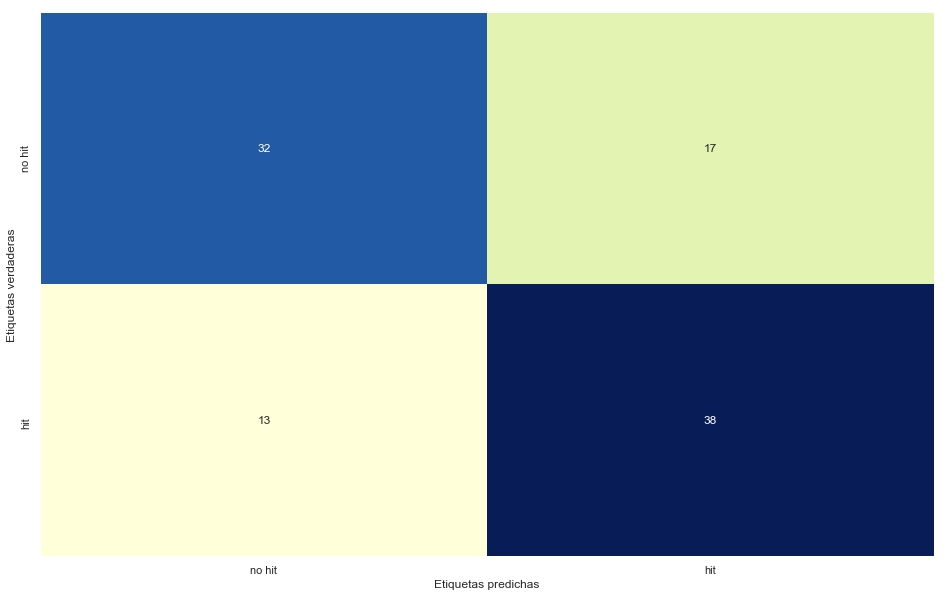

In [224]:
mat = confusion_matrix(df_prueba['target'], df_prueba['predicciones'])

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(mat, square=False, annot=True, fmt='d', cmap="YlGnBu", cbar=False,
            xticklabels=['no hit', 'hit'], yticklabels=['no hit', 'hit'])
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas');

# CLUSTERING DE HITS

In [83]:
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import sklearn.metrics as sm

In [84]:
df2 = df[df.target==1]
df2 = df2.reset_index()


In [85]:
df2.shape


(20553, 21)

In [86]:
X = df2[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']]

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


In [88]:
# K Means para k=2
k = 2

#Como siempre, suele ser una buena práctica fijar la semilla
kmeans = cluster.KMeans(n_clusters=k, random_state=0) 

kmeans.fit(X_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [89]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


In [90]:
labels


array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

In [91]:
centroids


array([[-0.56299019, -0.97305164, -0.04888674, -0.74517302,  0.27112293,
        -0.32774558,  1.01577555,  0.03870321,  0.02801463, -0.35010582,
        -0.15348972, -0.43860819, -0.36727064,  0.03786837, -0.34357359],
       [ 0.28242059,  0.48812541,  0.02452373,  0.3738115 , -0.13600716,
         0.16441157, -0.5095576 , -0.01941523, -0.01405337,  0.17562845,
         0.07699718,  0.22002512,  0.18423908, -0.01899644,  0.17235159]])

In [92]:
centroids.shape


(2, 15)

In [93]:
sm.silhouette_score(X_scaled, labels, metric='euclidean')


0.14113713174181322

In [94]:
sm.calinski_harabasz_score(X_scaled, labels)


2838.9820143184575

In [95]:
# Rango de clusters


For n_clusters = 2 The average silhouette_score is : 0.14105438370816956
For n_clusters = 3 The average silhouette_score is : 0.1118825867201672
For n_clusters = 4 The average silhouette_score is : 0.10396128344492833
For n_clusters = 5 The average silhouette_score is : 0.10730162189865497
For n_clusters = 6 The average silhouette_score is : 0.1020302287264044
For n_clusters = 7 The average silhouette_score is : 0.09905515695234143
For n_clusters = 8 The average silhouette_score is : 0.10827969699554835


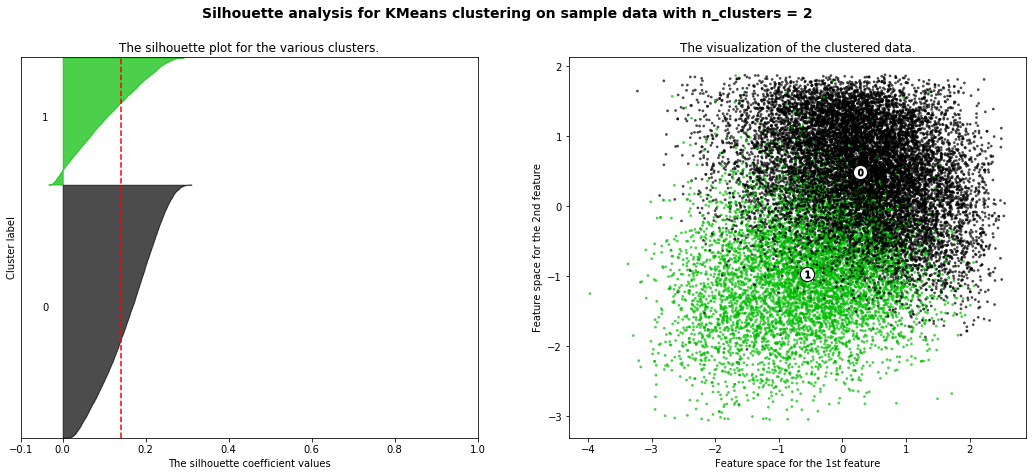

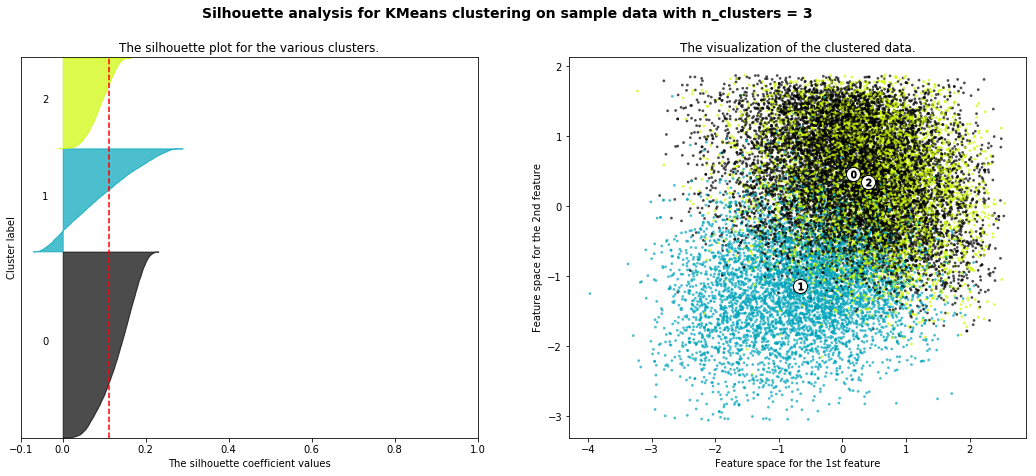

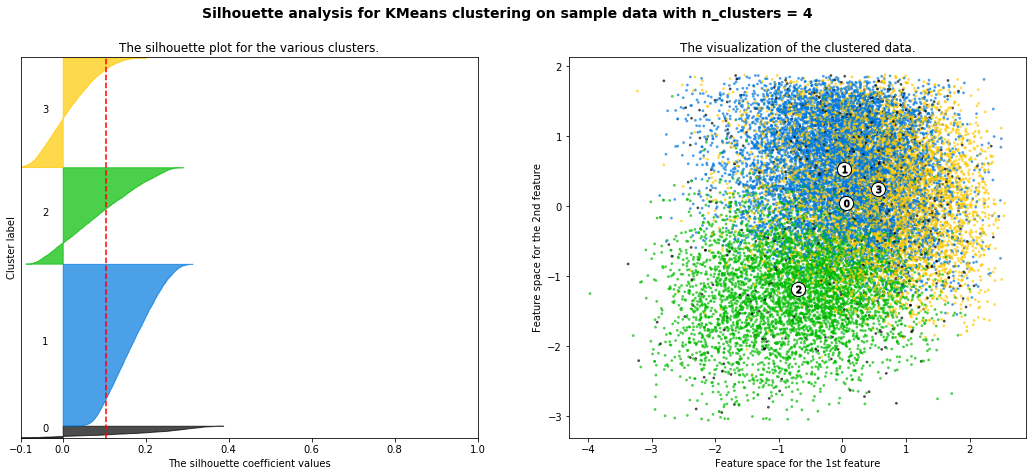

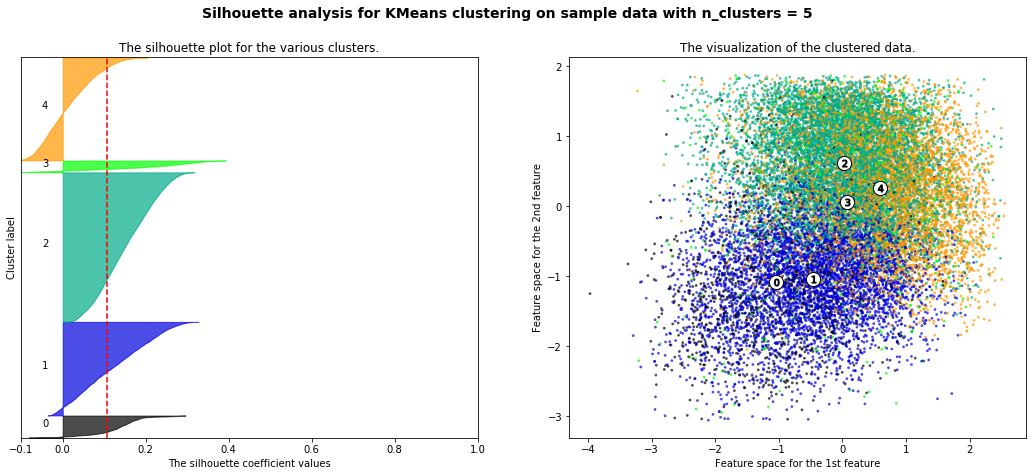

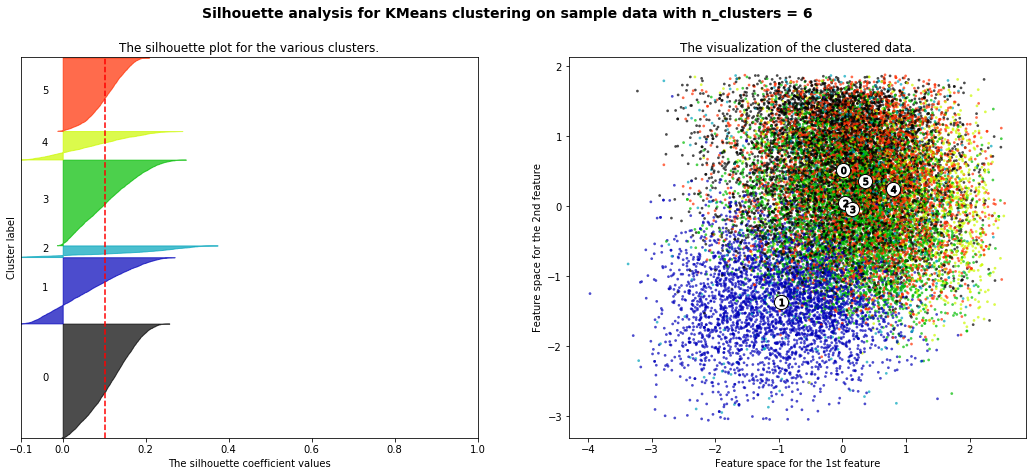

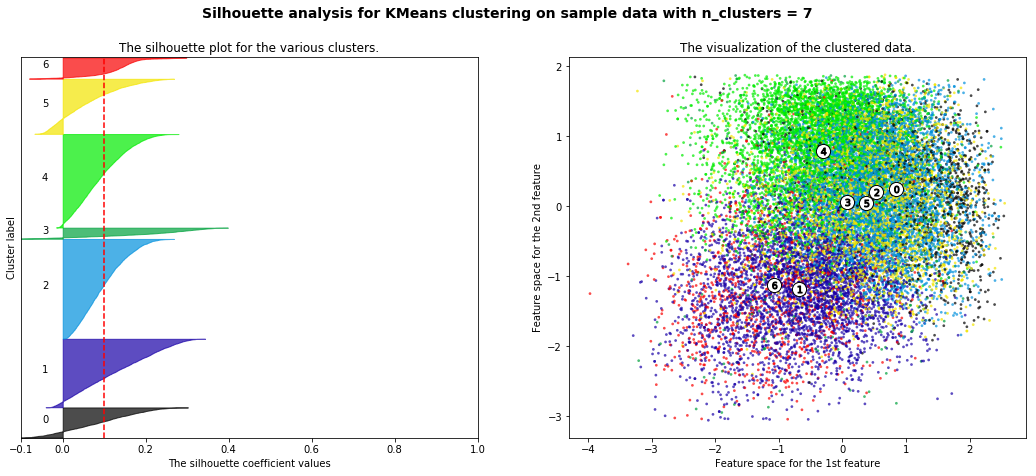

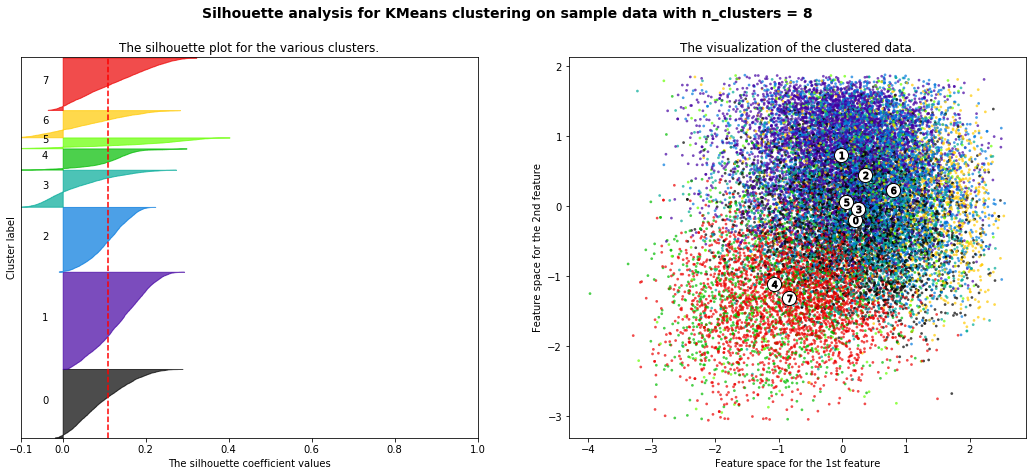

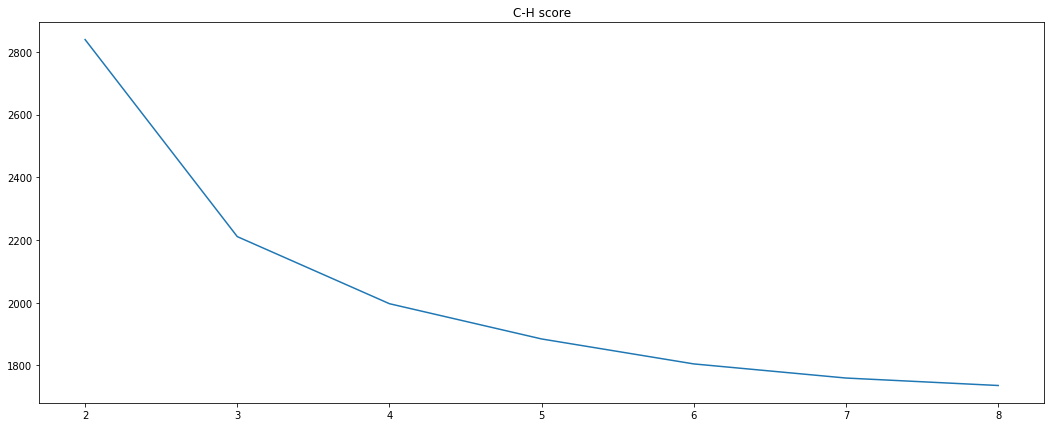

In [96]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
chs=[]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
    y_lower = 10
    chs.append(sm.calinski_harabasz_score(X_scaled, cluster_labels))
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.figure(figsize=[18, 7])
plt.plot(range_n_clusters,chs)
plt.title('C-H score')
plt.show()

In [97]:
evaluation = []
for k in range(2,9):
    
    #Como siempre, suele ser una buena práctica fijar la semilla
    kmeans = cluster.KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    silhouette = sm.silhouette_score(X_scaled, labels, metric='euclidean')
    calinsky = sm.calinski_harabasz_score(X_scaled, labels)      
    evaluation.append( [(k, silhouette, calinsky)])

In [98]:
evaluation

[[(2, 0.14113713174181322, 2838.9820143184575)],
 [(3, 0.1118777410763252, 2210.6186987065585)],
 [(4, 0.10558971788644136, 1931.7248150025732)],
 [(5, 0.11909406198541776, 1892.9823747751673)],
 [(6, 0.12389848868556591, 1854.8070106760304)],
 [(7, 0.11996798096280044, 1813.7092351115723)],
 [(8, 0.107351512315353, 1735.7451326234773)]]

In [99]:
# Estadistica Descriptiva Clusters k=2

In [100]:
kmeans = cluster.KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X_scaled)

labels2 = kmeans.labels_

df2['labels2'] = labels2

In [101]:
df2.head(10)

index  Unnamed: 0                      track                    artist  \
0      0           0                  Lucky Man         Montgomery Gentry   
1      1           1             On The Hotline              Pretty Ricky   
2      4           4            I Got A Feelin'          Billy Currington   
3      7           7          Where I Come From              Alan Jackson   
4      8           8         Nothin' To Die For                Tim McGraw   
5     10          10  F.U.R.B. (F U Right Back)                   Frankee   
6     11          11               Amarillo Sky              Jason Aldean   
7     13          13            Six-Pack Summer               Phil Vassar   
8     16          16  Daddy Won't Sell The Farm         Montgomery Gentry   
9     17          17                 Move Along  The All-American Rejects   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:4GiXBCUF7H6YfNQsnBRIzl         0.578   0.471    4    -7.270   
1  spotify:track:1zyqZONW985Cs4osz9wlsu         0.704   0.854   10    -5.477   
2  spotify:track:1tF370eYXUcWwkIvaq3IGz         0.630   0.764    2    -4.353   
3  spotify:track:6ej1QJ8eIYmhsyTlvgDajy         0.726   0.631   11    -8.136   
4  spotify:track:3lRSz6HujrSy9b3LXg2Kq9         0.481   0.786   10    -5.654   
5  spotify:track:7jElrCgQJBcVLsbMRKni2t         0.787   0.632    8    -3.487   
6  spotify:track:0axUHkhMMY0YSC1jFBVWqv         0.491   0.776    2    -3.887   
7  spotify:track:23qDMWnwf8p0pr5slljB6i         0.725   0.733    0    -6.660   
8  spotify:track:2Wt173KM9i97KSB52qCuqj         0.708   0.728    7    -7.039   
9  spotify:track:2l57cfmCnOkwNX1tky02n1         0.518   0.916    3    -3.858   

   mode  ...  instrumentalness  liveness  valence    tempo  duration_ms  \
0     1  ...          0.000000    0.1590    0.532  133.061       196707   
1     0  ...          0.000000    0.1480    0.688   92.988       242587   
2     1  ...          0.000000    0.1250    0.631  112.098       193760   
3     0  ...          0.000000    0.1930    0.746  124.711       239240   
4     1  ...          0.000000    0.0759    0.389  153.105       253640   
5     1  ...          0.000007    0.3880    0.612  141.026       198173   
6     1  ...          0.000000    0.1460    0.428  154.988       202547   
7     1  ...          0.000000    0.1730    0.843  100.311       219827   
8     1  ...          0.000023    0.0556    0.704  119.881       258640   
9     1  ...          0.000000    0.2910    0.646  109.864       238880   

   time_signature  chorus_hit  sections  target  labels2  
0               4    30.88059        13       1        0  
1               4    41.51106        10       1        1  
2               4    22.62384        10       1        1  
3               4    35.59732        10       1        1  
4               4    19.65701        11       1        1  
5               4    18.09100         9       1        1  
6               4    37.86861         9       1        1  
7               4    27.06630         8       1        1  
8               4    33.81641        15       1        1  
9               4    19.81215        10       1        1  

[10 rows x 22 columns]

In [102]:
df2.shape


(20553, 22)

In [103]:
df2.labels2.shape


(20553,)

In [104]:
df2.labels2.value_counts(normalize=True)

1    0.665986
0    0.334014
Name: labels2, dtype: float64

In [105]:
df2a = df2[df2.labels2==0]
df2a.describe()

index   Unnamed: 0  danceability       energy          key  \
count   6865.000000  6865.000000   6865.000000  6865.000000  6865.000000   
mean   20941.493372  3887.971449      0.515927     0.431068     5.073707   
std     8610.539093  2335.964057      0.143670     0.149111     3.484830   
min        0.000000     0.000000      0.000000     0.018100     0.000000   
25%    15189.000000  1892.000000      0.415000     0.331000     2.000000   
50%    19725.000000  3821.000000      0.523000     0.431000     5.000000   
75%    26550.000000  5748.000000      0.620000     0.529000     8.000000   
max    41103.000000  8635.000000      0.915000     0.995000    11.000000   

          loudness         mode  speechiness  acousticness  instrumentalness  \
count  6865.000000  6865.000000  6865.000000   6865.000000       6865.000000   
mean    -11.395688     0.850401     0.044250      0.559707          0.035714   
std       3.346541     0.356704     0.043976      0.243358          0.147547   
min     -28.030000     0.000000     0.000000      0.000028          0.000000   
25%     -13.529000     1.000000     0.029600      0.382000          0.000000   
50%     -11.166000     1.000000     0.033800      0.592000          0.000005   
75%      -9.012000     1.000000     0.042700      0.755000          0.000372   
max      -1.910000     1.000000     0.950000      0.994000          0.981000   

          liveness      valence        tempo    duration_ms  time_signature  \
count  6865.000000  6865.000000  6865.000000    6865.000000     6865.000000   
mean      0.197085     0.526751   116.026531  197277.652731        3.826366   
std       0.163466     0.244781    29.891742   54897.823744        0.463566   
min       0.013600     0.000000     0.000000   46893.000000        0.000000   
25%       0.099000     0.325000    92.637000  156560.000000        4.000000   
50%       0.134000     0.519000   113.145000  185667.000000        4.000000   
75%       0.237000     0.727000   134.984000  230853.000000        4.000000   
max       0.988000     0.985000   241.009000  651480.000000        5.000000   

        chorus_hit     sections  target  labels2  
count  6865.000000  6865.000000  6865.0   6865.0  
mean     39.873532     9.189221     1.0      0.0  
std      17.060113     2.484779     0.0      0.0  
min      13.331310     3.000000     1.0      0.0  
25%      28.310180     7.000000     1.0      0.0  
50%      36.051670     9.000000     1.0      0.0  
75%      46.990320    11.000000     1.0      0.0  
max     188.306050    30.000000     1.0      0.0

In [106]:
df2b = df2[df2.labels2==1]
df2b.describe()

index    Unnamed: 0  danceability        energy           key  \
count  13688.000000  13688.000000  13688.000000  13688.000000  13688.000000   
mean   20352.090590   3315.033460      0.644023      0.721206      5.336207   
std    13188.851452   1998.074546      0.136552      0.141053      3.600622   
min        1.000000      0.000000      0.113000      0.219000      0.000000   
25%     7689.750000   1621.000000      0.554000      0.622000      2.000000   
50%    21887.000000   3235.000000      0.650000      0.729000      6.000000   
75%    32650.250000   4891.000000      0.740000      0.832000      9.000000   
max    41105.000000   8632.000000      0.988000      0.997000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  13688.000000  13688.000000  13688.000000  13688.000000   
mean      -7.351380      0.669711      0.082080      0.140939   
std        2.918894      0.470334      0.086174      0.157942   
min      -20.281000      0.000000      0.022000      0.000002   
25%       -9.223250      0.000000      0.034500      0.021500   
50%       -6.866000      1.000000      0.046800      0.081300   
75%       -5.152000      1.000000      0.083000      0.210000   
max        2.291000      1.000000      0.935000      0.964000   

       instrumentalness      liveness       valence         tempo  \
count      13688.000000  13688.000000  13688.000000  13688.000000   
mean           0.028166      0.190406      0.651119    122.425692   
std            0.119875      0.162862      0.220453     26.314044   
min            0.000000      0.013000      0.037600     57.082000   
25%            0.000000      0.083400      0.495000    102.749000   
50%            0.000006      0.128000      0.680000    120.112000   
75%            0.000648      0.256000      0.835000    136.312750   
max            0.982000      0.999000      0.991000    217.396000   

        duration_ms  time_signature    chorus_hit      sections   target  \
count  1.368800e+04    13688.000000  13688.000000  13688.000000  13688.0   
mean   2.405487e+05        3.994082     38.898289     10.681984      1.0   
std    6.602896e+04        0.147188     17.286901      2.960156      0.0   
min    5.938700e+04        1.000000     13.117140      3.000000      1.0   
25%    2.020602e+05        4.000000     27.181918      9.000000      1.0   
50%    2.320050e+05        4.000000     34.951265     10.000000      1.0   
75%    2.682032e+05        4.000000     45.956913     12.000000      1.0   
max    1.561133e+06        5.000000    262.615400     64.000000      1.0   

       labels2  
count  13688.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0

In [107]:
np.mean(df2b)

index                20352.090590
Unnamed: 0            3315.033460
danceability             0.644023
energy                   0.721206
key                      5.336207
loudness                -7.351380
mode                     0.669711
speechiness              0.082080
acousticness             0.140939
instrumentalness         0.028166
liveness                 0.190406
valence                  0.651119
tempo                  122.425692
duration_ms         240548.695719
time_signature           3.994082
chorus_hit              38.898289
sections                10.681984
target                   1.000000
labels2                  1.000000
dtype: float64

In [108]:
np.mean(df2a)

index                20941.493372
Unnamed: 0            3887.971449
danceability             0.515927
energy                   0.431068
key                      5.073707
loudness               -11.395688
mode                     0.850401
speechiness              0.044250
acousticness             0.559707
instrumentalness         0.035714
liveness                 0.197085
valence                  0.526751
tempo                  116.026531
duration_ms         197277.652731
time_signature           3.826366
chorus_hit              39.873532
sections                 9.189221
target                   1.000000
labels2                  0.000000
dtype: float64

In [109]:
values_a = [np.mean(df2a['danceability']), np.mean(df2a['energy']),
       np.mean(df2a['mode']), np.mean(df2a['speechiness']), np.mean(df2a['acousticness']),
       np.mean(df2a['instrumentalness']), np.mean(df2a['liveness']),np.mean(df2a['valence'])]


In [110]:
values_a

[0.5159269919883464,
 0.4310678514202471,
 0.8504005826656955,
 0.04425019664967213,
 0.5597066050837587,
 0.035714463329934526,
 0.19708493809177022,
 0.526751085214858]

In [111]:
values_b = [np.mean(df2b['danceability']), np.mean(df2b['energy']),
       np.mean(df2b['mode']), np.mean(df2b['speechiness']), 
       np.mean(df2b['acousticness']), np.mean(df2b['instrumentalness']), np.mean(df2a['liveness']),
       np.mean(df2b['valence'])]     

In [112]:
values_b

[0.6440234511981282,
 0.7212058007013429,
 0.6697106954997077,
 0.08207969023962566,
 0.14093939942577485,
 0.028165783162624282,
 0.19708493809177022,
 0.651118972822911]

(<a list of 18 Line2D thetagridline objects>,
 <a list of 9 Text thetagridlabel objects>)

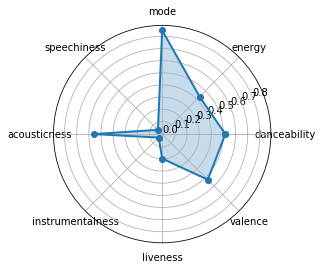

In [113]:
# Grafico de telarana 1er Cluster

import matplotlib.pyplot as plt

# Datos
angles = np.linspace(0, 2 * np.pi, 8, endpoint=False)
values = values_a

# Se repite el primer valor para cerrar el gráfico
angles=np.concatenate((angles, [angles[0]]))
values=np.concatenate((values, [values[0]]))

labels=['danceability', 'energy',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence']

# Representación del mapa de calor
plt.polar(angles, values, 'o-', linewidth=2)
plt.fill(angles, values, alpha=0.25)
plt.thetagrids(angles * 180 / np.pi, labels)


(<a list of 18 Line2D thetagridline objects>,
 <a list of 9 Text thetagridlabel objects>)

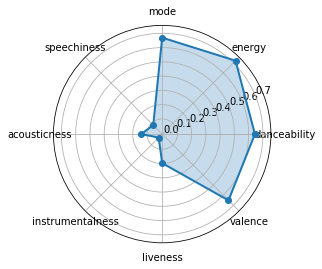

In [114]:
# Grafico de telarana 2do Cluster

import matplotlib.pyplot as plt

# Datos
angles = np.linspace(0, 2 * np.pi, 8, endpoint=False)
values = values_b

# Se repite el primer valor para cerrar el gráfico
angles=np.concatenate((angles, [angles[0]]))
values=np.concatenate((values, [values[0]]))

labels=['danceability', 'energy',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence']

# Representación del mapa de calor
plt.polar(angles, values, 'o-', linewidth=2)
plt.fill(angles, values, alpha=0.25)
plt.thetagrids(angles * 180 / np.pi, labels)

# TSNE: REDUCCION DE LA DIMENSIONALIDAD BASE COMPLETA

In [115]:
y = df['target']
X = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit']]

# Importamos la clase TSNE de sklearn
from sklearn.manifold import TSNE

# Instanciamos y fiteamos el modelo
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

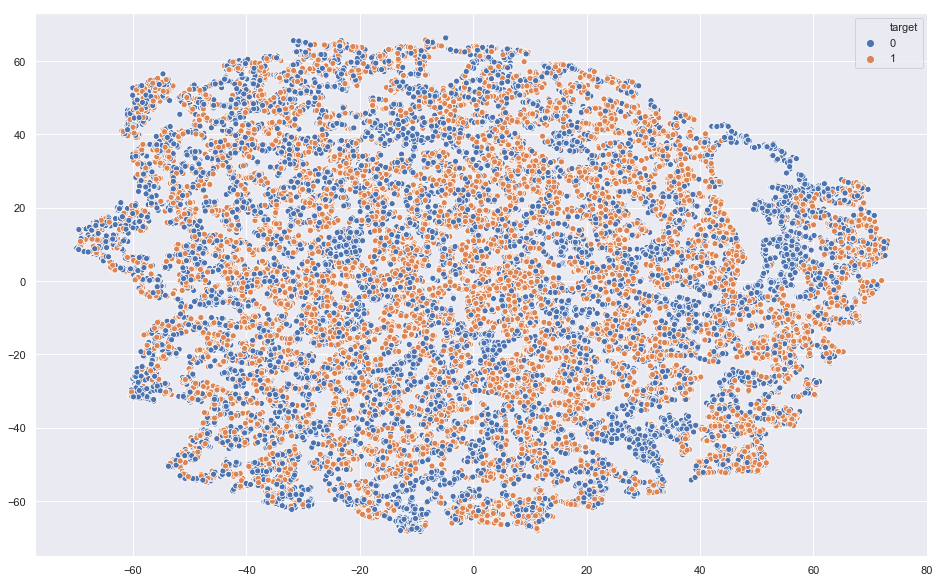

In [116]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)})

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y,legend='full')

# RECOMENDADOR DE CANCIONES CON SONIDO SIMILAR (FEATURES MUSICALES)

In [117]:
X = df[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']]

# Escaleo de los features
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

# Importo el modelo
from sklearn.neighbors import NearestNeighbors

model_nn = NearestNeighbors(metric='cosine', n_neighbors=6, algorithm='brute') #instancio

model_nn.fit(X_sc) #fiteo


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                 radius=1.0)

In [118]:
model_nn.kneighbors(X_sc, return_distance=False)


array([[    0,  4178, 10493, 24259, 40044, 36611],
       [    1, 40626,  5368,  5492, 37952, 29354],
       [    2,  3776,  2545,  8555, 10224,  4055],
       ...,
       [41103, 25108, 39886, 29261, 33512, 32725],
       [41104,  5748,   658,  2524,  8518,  7459],
       [41105,  3613,  7454, 29222, 36255, 38446]])

In [119]:
model_nn.kneighbors(X_sc[0,:].reshape(1,-1), n_neighbors=6,return_distance=False)


array([[    0,  4178, 10493, 24259, 40044, 36611]])

In [120]:
model_nn.kneighbors(X_sc[3000,:].reshape(1,-1), n_neighbors=6, return_distance=False)


array([[ 3000, 29468,  4658,  3700, 39272,  9230]])

In [121]:
df['tema']=(df['track']+"("+df['artist']+")")


In [122]:
indices = pd.Series(df.index, index=df['tema']).drop_duplicates()


In [123]:
indices

tema
Lucky Man(Montgomery Gentry)                          0
On The Hotline(Pretty Ricky)                          1
Clouds Of Dementia(Candlemass)                        2
Heavy Metal, Raise Hell!(Zwartketterij)               3
I Got A Feelin'(Billy Currington)                     4
                                                  ...  
(You're A) Go Nowhere(Reagan Youth)               41101
La Fiebre de Norma(La Castañeda)                  41102
Good Times(Edie Brickell)                         41103
Inane(KMFDM)                                      41104
You Can Make History (Young Again)(Elton John)    41105
Length: 41106, dtype: int64

In [124]:
#indices.reset_index(drop=True)


In [125]:
indices['La Fiebre de Norma(La Castañeda)']


41102

In [126]:
model_nn.kneighbors(X_sc[indices['Clouds Of Dementia(Candlemass)'],:].reshape(1,-1), n_neighbors=6, return_distance=False)

array([[    2,  3776,  2545,  8555, 10224,  4055]])

In [129]:
def give_rec(title):
    # Indice de la cancion
    idx = indices[title]

    # indices mas cercanos a ese indice 
    vecinos = model_nn.kneighbors(X_sc[idx,:].reshape(1,-1), n_neighbors=6, return_distance=False)

    # Top de canciones mas similares
    
    list2=[]
    for i in vecinos:
        #if i!= idx | i!='Lucky Man(Montgomery Gentry)':
            list2.append(df['tema'][i])
            print(list2)
    

In [130]:
# Testing our content-based recommendation system
give_rec('Me And My Friends(Red Hot Chili Peppers)')


[32440     Me And My Friends(Red Hot Chili Peppers)
1784                  She Loves Me Not(Papa Roach)
39356                         Revelation(Metalium)
33770    Fight Like A Brave(Red Hot Chili Peppers)
4804                     Coma Divine(Final Breath)
35687                     Like The Worms(Kickback)
Name: tema, dtype: object]


In [131]:
df[df.artist=='Red Hot Chili Peppers']

Unnamed: 0                                              track  \
993           993                                    Dani California   
1048         1048                                         Can't Stop   
1806         1806                                    Californication   
1904         1904                                    Snow ((Hey Oh))   
2561         2561                                    The Zephyr Song   
3161         3161                                       Tell Me Baby   
3570         3570                                          Otherside   
3707         3707                                         By The Way   
7269         1397                The Adventures Of Rain Dance Maggie   
12252        6380                                   Dark Necessities   
29158         480                       Stone Cold Bush - Remastered   
29231         553                  Nobody Weird Like Me - Remastered   
29718        1040                                     Behind The Sun   
30637        1959            Get Up And Jump - 2002 Digital Remaster   
31706        3028  True Men Don't Kill Coyotes - 2002 Digital Rem...   
32440        3762                                  Me And My Friends   
33134        4456                     Sexy Mexican Maid - Remastered   
33770        5092                                 Fight Like A Brave   
34465        5787                       Subway To Venus - Remastered   
34547        5869                         Higher Ground - Remastered   
35765         179                                   Under The Bridge   
35980         394                 Soul To Squeeze (From "Coneheads")   
36605        1019                                       Give It Away   
38156        2570                                        Scar Tissue   

                      artist                                   uri  \
993    Red Hot Chili Peppers  spotify:track:10Nmj3JCNoMeBQ87uw5j8k   
1048   Red Hot Chili Peppers  spotify:track:3ZOEytgrvLwQaqXreDs2Jx   
1806   Red Hot Chili Peppers  spotify:track:48UPSzbZjgc449aqz8bxox   
1904   Red Hot Chili Peppers  spotify:track:2aibwv5hGXSgw7Yru8IYTO   
2561   Red Hot Chili Peppers  spotify:track:1ndGB6rvxKYN9seCYO1dTF   
3161   Red Hot Chili Peppers  spotify:track:0itNMuBHye9fu392b4e9oa   
3570   Red Hot Chili Peppers  spotify:track:64BbK9SFKH2jk86U3dGj2P   
3707   Red Hot Chili Peppers  spotify:track:1f2V8U1BiWaC9aJWmpOARe   
7269   Red Hot Chili Peppers  spotify:track:0PgNhIg5n0UAOBVn43b8b6   
12252  Red Hot Chili Peppers  spotify:track:2oaK4JLVnmRGIO9ytBE1bt   
29158  Red Hot Chili Peppers  spotify:track:6vmvgfFCAUFyAiFLkg6FXr   
29231  Red Hot Chili Peppers  spotify:track:0tp9eoX9x9RZ2STDVarBBs   
29718  Red Hot Chili Peppers  spotify:track:2OCr6iAGslZkjuk8VTpAbe   
30637  Red Hot Chili Peppers  spotify:track:5OAp7U1GWlYeI0qYsdRmbb   
31706  Red Hot Chili Peppers  spotify:track:3feCEAjM17x1fdQLmpbv98   
32440  Red Hot Chili Peppers  spotify:track:3eiIQPGp6biDu91bKgAEzg   
33134  Red Hot Chili Peppers  spotify:track:6cvDm4TzE9Rartsazd63S5   
33770  Red Hot Chili Peppers  spotify:track:6NeRpRTcFftvt3j1vF4Pcw   
34465  Red Hot Chili Peppers  spotify:track:2JjM0vE6PADTFb2LXdAzVG   
34547  Red Hot Chili Peppers  spotify:track:5arVt2Wg0zbiWwAOZef2Nl   
35765  Red Hot Chili Peppers  spotify:track:3d9DChrdc6BOeFsbrZ3Is0   
35980  Red Hot Chili Peppers  spotify:track:6pkzrU2RKoPcQJHT7dwlbP   
36605  Red Hot Chili Peppers  spotify:track:0uppYCG86ajpV2hSR3dJJ0   
38156  Red Hot Chili Peppers  spotify:track:1G391cbiT3v3Cywg8T7DM1   

       danceability  energy  key  loudness  mode  speechiness  ...  \
993           0.556   0.913    0    -2.360     1       0.0437  ...   
1048          0.618   0.938    9    -3.442     1       0.0456  ...   
1806          0.592   0.767    9    -2.788     0       0.0270  ...   
1904          0.427   0.900   11    -3.674     1       0.0499  ...   
2561          0.725   0.803    2    -4.083     1       0.0337  ...   
3161          0.695   0.993    0   

In [132]:
give_rec('La Fiebre de Norma(La Castañeda)')

[41102      La Fiebre de Norma(La Castañeda)
3867                         Love Song(311)
37075      Life Is a Distance(Beborn Beton)
11424    Whatever It Takes(Imagine Dragons)
11009                          Pilot(Hella)
19100    Rhapsody In The Rain(Lou Christie)
Name: tema, dtype: object]


In [133]:
give_rec('Radio Ga Ga(Queen)')

[34470                                   Radio Ga Ga(Queen)
37707    Bop Gun (One Nation)(Ice Cube Featuring George...
33533                               בדואי זקן(Zohar Argov)
33387    I Wonder If I Take You Home(Lisa Lisa And Clul...
34487              In The Shape Of A Heart(Jackson Browne)
33237                  Tender Is The Night(Jackson Browne)
Name: tema, dtype: object]


In [166]:
give_rec('Lucky Man(Montgomery Gentry)')

[0                          Lucky Man(Montgomery Gentry)
4178              One Wing In The Fire(Trent Tomlinson)
10493    Landslide(Glee Cast Featuring Gwyneth Paltrow)
24259               Please Come To Boston(Dave Loggins)
40044               Fall Of Another Year (Aug. 69)(CAN)
36611                You're Still The One(Shania Twain)
Name: tema, dtype: object]


In [172]:
give_rec('Me And My Friends(Red Hot Chili Peppers)')

[32440     Me And My Friends(Red Hot Chili Peppers)
1784                  She Loves Me Not(Papa Roach)
39356                         Revelation(Metalium)
33770    Fight Like A Brave(Red Hot Chili Peppers)
4804                     Coma Divine(Final Breath)
35687                     Like The Worms(Kickback)
Name: tema, dtype: object]


In [177]:
df[['tema','danceability', 'energy',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence']].iloc[indices[['Me And My Friends(Red Hot Chili Peppers)','She Loves Me Not(Papa Roach)',
                                 'Revelation(Metalium)','Fight Like A Brave(Red Hot Chili Peppers)',
                                 'Coma Divine(Final Breath)','Like The Worms(Kickback)']]]

tema  danceability  energy  mode  \
32440   Me And My Friends(Red Hot Chili Peppers)         0.580   0.996     1   
1784                She Loves Me Not(Papa Roach)         0.598   0.955     1   
39356                       Revelation(Metalium)         0.450   0.979     1   
33770  Fight Like A Brave(Red Hot Chili Peppers)         0.719   0.936     1   
4804                   Coma Divine(Final Breath)         0.327   0.968     1   
35687                   Like The Worms(Kickback)         0.446   0.896     1   

       speechiness  acousticness  instrumentalness  liveness  valence  
32440       0.1270      0.019300          0.000007     0.268    0.202  
1784        0.0916      0.001220          0.000000     0.243    0.402  
39356       0.1680      0.000008          0.169000     0.275    0.245  
33770       0.0969      0.005240          0.000051     0.360    0.276  
4804        0.1670      0.000241          0.009650     0.396    0.127  
35687       0.0572      0.000025          0.000007     0.224    0.263

# RECOMENDADOR DE CANCIONES CON LETRA SIMILAR

In [134]:
import pandas as pd
import numpy as np

In [135]:
df6 = pd.read_csv("generos.csv")

In [136]:
df6= df6.sample(10000, random_state=42)
df6 = df6.reset_index()

In [137]:
df6.head()

index  Unnamed: 0         artist  \
0  25614       25029  Peter Gabriel   
1  24388       23932        Madness   
2  22636       22212     Kat Graham   
3  54161       50462     Alice Babs   
4  96632       95006      The Tubes   

                                                 seq                     song  \
0  In the big house\r\nWhere the sun lives\r\nWit...  The Time of the Turning   
1  When I get home it's late at night,\r\nI'm bla...                 Grey Day   
2  Denim-jean jacket, pink Chucks\nAnd a mini ski...  Put Your Graffiti on Me   
3  Ooh\r\n\r\nLord, dear Lord above, God almighty...              Come Sunday   
4  I feel something special about that hit there\...   Outside Lookin' Inside   

    label           name                            spotify_uri  \
0  0.2510  Peter Gabriel  spotify:artist:7C4sUpWGlTy7IANjruj02I   
1  0.5870        Madness  spotify:artist:4AYkFtEBnNnGuoo8HaHErd   
2  0.9240     Kat Graham  spotify:artist:4rPZIJpeNz7GBm2t8YhR7j   
3  0.0491     Alice Babs  spotify:artist:3omPckNeXtMpCdOXVfcOST   
4  0.3890      The Tubes  spotify:artist:7zfhej6FnVXN9LIXs6dcoK   

                                              genres  
0  ['album rock', 'art pop', 'art rock', 'classic...  
1  ['dance rock', 'new romantic', 'ska', 'ska rev...  
2                    ['electropop', 'post-teen pop']  
3  ['barnmusik', 'swedish jazz', 'vintage swedish...  
4  ['album rock', 'art rock', 'classic rock', 'da...

In [138]:
print("Letras:",df6.shape)

Letras: (10000, 9)


In [139]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
index          10000 non-null int64
Unnamed: 0     10000 non-null int64
artist         10000 non-null object
seq            10000 non-null object
song           10000 non-null object
label          10000 non-null float64
name           10000 non-null object
spotify_uri    10000 non-null object
genres         10000 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


In [140]:
df6.columns=['id','id2','artist','letra','cancion','label','artista2','uri','genero']

In [141]:
np.sum(df6.cancion.isnull())

0

In [142]:
np.sum(df6.letra.isnull())

0

In [143]:
# Se genera la columna tema (cancion (artista))

df6['tema']=(df6['cancion']+"("+df6['artist']+")")

In [144]:
df6.columns

Index(['id', 'id2', 'artist', 'letra', 'cancion', 'label', 'artista2', 'uri',
       'genero', 'tema'],
      dtype='object')

In [145]:
df6.head(1)['letra']

0    In the big house\r\nWhere the sun lives\r\nWit...
Name: letra, dtype: object

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Relleno de NaNs con string vacio
df6['letra'] = df6['letra'].fillna('')

In [147]:
# Fiteo del TF-IDF
tfv_matrix = tfv.fit_transform(df6['letra'])

In [148]:
tfv_matrix

<10000x69258 sparse matrix of type '<class 'numpy.float64'>'
	with 934323 stored elements in Compressed Sparse Row format>

In [149]:
tfv_matrix.shape

(10000, 69258)

In [150]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Se computa el sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [151]:
sig[0]

array([0.76160022, 0.76159431, 0.76159417, ..., 0.76159423, 0.76159425,
       0.76159418])

In [165]:
# Mapeo de indices - temas
indices2 = pd.Series(df6.index, index=df6['tema']).drop_duplicates()
indices2

tema
The Time of the Turning(Peter Gabriel)              0
Grey Day(Madness)                                   1
Put Your Graffiti on Me(Kat Graham)                 2
Come Sunday(Alice Babs)                             3
Outside Lookin' Inside(The Tubes)                   4
                                                 ... 
Run Home(Priestess)                              9995
Fortune Faded [#](Red Hot Chili Peppers)         9996
Nothing to Worry About(Peter Bjorn and John)     9997
Whiskey Rock-A Roller(Lynyrd Skynyrd)            9998
Angels We Have Heard on High(David Archuleta)    9999
Length: 10000, dtype: int64

In [153]:
indices2['Grey Day(Madness)']

1

In [154]:
sig[9995]

array([0.76159419, 0.76159421, 0.76159418, ..., 0.76159417, 0.76159431,
       0.76159416])

In [155]:
list(enumerate(sig[indices2['Grey Day(Madness)']]))

[(0, 0.7615943137906919),
 (1, 0.7616002197999908),
 (2, 0.7615942017737823),
 (3, 0.7615942241220608),
 (4, 0.7615944088727044),
 (5, 0.7615941853350758),
 (6, 0.7615942093107428),
 (7, 0.7615944227574153),
 (8, 0.7615941832198057),
 (9, 0.7615942184218175),
 (10, 0.7615942409514015),
 (11, 0.7615942029959402),
 (12, 0.7615942426086502),
 (13, 0.7615942421383047),
 (14, 0.7615942058576555),
 (15, 0.7615941938450465),
 (16, 0.761594279765181),
 (17, 0.7615941736523183),
 (18, 0.7615942751635245),
 (19, 0.761594245798148),
 (20, 0.7615942335458405),
 (21, 0.7615943308733283),
 (22, 0.7615942145830631),
 (23, 0.7615942243958482),
 (24, 0.7615941930969077),
 (25, 0.7615942370380028),
 (26, 0.7615941781588728),
 (27, 0.7615942110018181),
 (28, 0.7615942857812664),
 (29, 0.7615942262310973),
 (30, 0.7615942183864809),
 (31, 0.761594306613992),
 (32, 0.7615942109005126),
 (33, 0.761594185998835),
 (34, 0.7615941838159873),
 (35, 0.7615942203521776),
 (36, 0.7615942631269754),
 (37, 0.7615941939694417),
 (38, 0.7615942838450827),
 (39, 0.7615943897099691),
 (40, 0.7615942078842558),
 (41, 0.7615941728770035),
 (42, 0.7615942379826327),
 (43, 0.7615943157061917),
 (44, 0.7615941859299937),
 (45, 0.7615941657624031),
 (46, 0.7615941921333388),
 (47, 0.7615942665700682),
 (48, 0.761594181871385),
 (49, 0.7615942065373827),
 (50, 0.761594203883384),
 (51, 0.7615942878469493),
 (52, 0.7615942269761293),
 (53, 0.7615941612000874),
 (54, 0.761594216570114),
 (55, 0.7615943641062076),
 (56, 0.7615942231165529),
 (57, 0.7615941998831774),
 (58, 0.7615942683200816),
 (59, 0.761594226735354),
 (60, 0.7615942666835368),
 (61, 0.7615942703937703),
 (62, 0.761594294858438),
 (63, 0.7615941693004922),
 (64, 0.7615943939701852),
 (65, 0.7615942102985939),
 (66, 0.7615941592951453),
 (67, 0.7615942404649816),
 (68, 0.7615941968085367),
 (69, 0.7615942174904243),
 (70, 0.761594207352976),
 (71, 0.7615942864048802),
 (72, 0.7615942354859104),
 (73, 0.7615941660468344),
 (74, 0.7615943205643816),
 (75, 0.7615942281396983),
 (76, 0.7615942223352753),
 (77, 0.7615942055466742),
 (78, 0.7615942247132957),
 (79, 0.7615942427630542),
 (80, 0.7615941923065201),
 (81, 0.7615941713046565),
 (82, 0.7615941905537941),
 (83, 0.7615941828280478),
 (84, 0.7615941874814554),
 (85, 0.7615943429488828),
 (86, 0.7615942888776975),
 (87, 0.7615942025250912),
 (88, 0.7615941967396399),
 (89, 0.7615944031656191),
 (90, 0.7615942118105078),
 (91, 0.7615942974530214),
 (92, 0.7615941825770481),
 (93, 0.7615944159560756),
 (94, 0.7615942414432003),
 (95, 0.7615941947619013),
 (96, 0.7615942015648521),
 (97, 0.7615941657214106),
 (98, 0.7615941613399754),
 (99, 0.7615942540966806),
 (100, 0.7615942593366881),
 (101, 0.7615942378899232),
 (102, 0.7615942992198982),
 (103, 0.7615942653172852),
 (104, 0.7615942741152408),
 (105, 0.761594234272224),
 (106, 0.7615942019239645),
 (107, 0.7615941900677561),
 (108, 0.7615941990848613),
 (109, 0.7615942753317134),
 (110, 0.7615942769566775),
 (111, 0.7615942167638939),
 (112, 0.7615942226091738),
 (113, 0.7615942337454193),
 (114, 0.761594204913959),
 (115, 0.7615943256925191),
 (116, 0.76159421742751),
 (117, 0.7615941803683426),
 (118, 0.7615942423714497),
 (119, 0.7615942574685967),
 (120, 0.7615941970865366),
 (121, 0.7615941978856894),
 (122, 0.7615943761002769),
 (123, 0.7615942137246468),
 (124, 0.7615942567958338),
 (125, 0.7615942545295712),
 (126, 0.7615941893499789),
 (127, 0.7615942071685962),
 (128, 0.761594165308536),
 (129, 0.761594167034692),
 (130, 0.761594205101056),
 (131, 0.7615941585497666),
 (132, 0.7615941861134732),
 (133, 0.7615942722329374),
 (134, 0.7615942466539983),
 (135, 0.7615941766172118),
 (136, 0.7615942723295474),
 (137, 0.7615942285607739),
 (138, 0.7615943942311595),
 (139, 0.7615941706447727),
 (140, 0.7615942960906),
 (141, 0.7615943436819633),
 (142, 0.7615942285533684),
 (143, 0.7615941788325216),
 (144, 0.7615942984421602),
 (145, 0.761594258731257),
 (146, 0.7615941632353546),
 (147, 0.761594

In [167]:
# Funcion de recomendacion

def give_reco(title2, sig=sig):
    # Indice correspondiente al tema
    idx2 = indices2[title2]

    # Lista de indices con scores de similaridad
    sig_scores = list(enumerate(sig[idx2]))

    # Ordenamiento de las canciones 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores de las caciones mas similares
    sig_scores = sig_scores[1:6]

    # Indices de esas diez canciones
    tema_indices = [i[0] for i in sig_scores]

    # Temas correspondientes a esos indices
    return df6['tema'].iloc[tema_indices]

In [168]:
df6[df6.artist=='Red Hot Chili Peppers']

id    id2                 artist  \
422   15627  14954  Red Hot Chili Peppers   
751   15820  15050  Red Hot Chili Peppers   
1144  15766  15023  Red Hot Chili Peppers   
1313  15753  15017  Red Hot Chili Peppers   
3055  15774  15027  Red Hot Chili Peppers   
3502  15635  14958  Red Hot Chili Peppers   
3589  15692  14986  Red Hot Chili Peppers   
3741  15613  14947  Red Hot Chili Peppers   
4140  15827  15054  Red Hot Chili Peppers   
4469  15858  15069  Red Hot Chili Peppers   
4612  15844  15062  Red Hot Chili Peppers   
5525  15832  15056  Red Hot Chili Peppers   
6092  15645  14963  Red Hot Chili Peppers   
6207  15600  14940  Red Hot Chili Peppers   
6627  15749  15015  Red Hot Chili Peppers   
6960  15661  14971  Red Hot Chili Peppers   
7555  15899  15090  Red Hot Chili Peppers   
7942  15666  14973  Red Hot Chili Peppers   
8033  15723  15002  Red Hot Chili Peppers   
8788  15782  15031  Red Hot Chili Peppers   
8931  15671  14976  Red Hot Chili Peppers   
9124  15669  14975  Red Hot Chili Peppers   
9550  15610  14945  Red Hot Chili Peppers   
9552  15838  15059  Red Hot Chili Peppers   
9648  15818  15049  Red Hot Chili Peppers   
9996  15815  15048  Red Hot Chili Peppers   

                                                  letra  \
422   Fuck 'em just to see that look on their face\r...   
751   Scar tissue that I wish you saw\r\nSarcastic M...   
1144  Some come up and some come young\r\nLive to lo...   
1313  I'm a street walking cheetah with a heart full...   
3055  To finger paint is not a sin \r\nI put my midd...   
3502  Time to swing a little melody\r\nTo make you a...   
3589  If you want me to stay I'll be around today\r\...   
3741  Look at that turtle go, bro!\r\n\r\nOn a far a...   
4140  Getting born in the state of Mississippi\r\nPa...   
4469  Bells around Saint Petersburg\r\nWhen I saw yo...   
4612  She's the one she's the only one\r\nShe's got ...   
5525  All alone not by myself\r\nAnother girl bad fo...   
6092  Why do you do what you do\r\nI do what I want ...   
6207  Pumpin' the blood through the heart of New Orl...   
6627  I think I'll go on a walkabout\r\nAnd find out...   
6960  Me and my, me and my, me and my, me and my, me...   
7555  The crimson tide is flowing through your finge...   
7942  Me and my, me and my, me and my,\r\nMe and my,...   
8033  I can't rest in war\r\nWill you be my friend?\...   
8788  Close to my skin\r\nI'm falling in someone who...   
8931  L.A. Lakers fast break makers \r\nKinds of the...   
9124  People keep on learnin' \r\nSoldiers keep on w...   
9550  Aw!\r\nPolice helicopter shot the sky\r\nPolic...   
9552  Won't somebody come along\r\nAnd teach me how ...   
9648  My friends are so depressed\r\nI feel the ques...   
9996  They say in chess, you gotta kill the queen\r\...   

                         cancion  label               artista2  \
422                Freaky Styley  0.553  Red Hot Chili Peppers   
751                  Scar Tissue  0.547  Red Hot Chili Peppers   
1144                 I Like Dirt  0.802  Red Hot Chili Peppers   
1313          Search and Destroy  0.368  Red Hot Chili Peppers   
3055                Purple Stain  0.821  Red Hot Chili Peppers   
3502                     Sex Rap  0.812  Red Hot Chili Peppers   
3589      If You Want Me to Stay  0.794  Red Hot Chili Peppers   
3741           Yertle the Turtle  0.964  Red Hot Chili Peppers   
4140             Dani California  0.730  Red Hot Chili Peppers   
4469            Stadium Arcadium  0.219  Red Hot Chili Peppers   
4612        Make You Feel Better  0.680  Red Hot Chili Peppers   
5525           Desecration Smile  0.436  Red Hot Chili Peppers   
6092                 Funky Crime  0.528  Red Hot Chili Peppers   
6207            Blackeyed Blonde  0.321  Red Hot Chili Peppers   
6627                   Walkabout  0.766  Red Hot Chili Peppers   
6960           Me and My Friends  0.202  Red Hot Chili Peppers   
7555           Monarchy of Roses  0.222  Red Hot Chili Peppers   
7942       

In [169]:
# Testing our content-based recommendation system
give_reco('Me and My Friends(Red Hot Chili Peppers)')

1583    How Many of Us Have Them(Bone Thugs-N-Harmony)
1630                   Disappointed(Public Image Ltd.)
6527                                  Friends(Whodini)
7942      Me and My Friends [*](Red Hot Chili Peppers)
5374                Where Have You Been(Merle Haggard)
Name: tema, dtype: object

In [170]:
give_reco('Grey Day(Madness)')

7375                        Marching Song(Barney)
8458                 Trust and Betrayal(Evergrey)
4307                      Baked Bean(Haircut 100)
5274    Rain Is Falling(Electric Light Orchestra)
2645                  My Happiness(Elvis Presley)
Name: tema, dtype: object

In [171]:
give_reco('Run Home(Priestess)')

1469                     Return to Patagonia(Lemon Jelly)
725                        Coming Home(Avenged Sevenfold)
2840                                 Gone(Kelly Clarkson)
1222                            Heartbeat(Cloud Nothings)
4240    If You See My Rooster (Please Run Him Home)(Me...
Name: tema, dtype: object

In [173]:
give_reco('Me and My Friends(Red Hot Chili Peppers)')

1583    How Many of Us Have Them(Bone Thugs-N-Harmony)
1630                   Disappointed(Public Image Ltd.)
6527                                  Friends(Whodini)
7942      Me and My Friends [*](Red Hot Chili Peppers)
5374                Where Have You Been(Merle Haggard)
Name: tema, dtype: object

In [189]:
df12=df6[['tema','letra']].iloc[[1583,1630,6527,7942,5374]]
df12

tema  \
1583  How Many of Us Have Them(Bone Thugs-N-Harmony)   
1630                 Disappointed(Public Image Ltd.)   
6527                                Friends(Whodini)   
7942    Me and My Friends [*](Red Hot Chili Peppers)   
5374              Where Have You Been(Merle Haggard)   

                                                  letra  
1583  Man, muthafucka, give muthafucka another rope ...  
1630  What friends are for\r\nWhat friends are for\r...  
6527  *Friends \n How many of us have them?\n Friend...  
7942  Me and my, me and my, me and my,\r\nMe and my,...  
5374  Look around you, look at your friends\r\nThey'...

# TOPIC MODELING (MNF)

In [190]:
import ast
import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import string
from nltk.corpus import stopwords
stop = stopwords.words('english')
exclude = string.punctuation

In [207]:
# Generamos los vectores de las letras
count_vect = CountVectorizer(ngram_range = (1,3), max_df = 0.2, min_df = 0.01,stop_words=stop, lowercase=True)
x_counts = count_vect.fit_transform(df12['letra'])

In [208]:
# Generamos la matriz con valorización tf-idf
tfidf_transformer = TfidfTransformer(norm = 'l2')
x_tfidf = tfidf_transformer.fit_transform(x_counts)

In [209]:
x_tfidf.shape

(5, 2021)

In [210]:
# Imponemos el número de  tópicos
dim = 1

In [211]:
# Realizamos la descomposición NMF
nmf = NMF(n_components = dim)
nmf_array = nmf.fit_transform(x_tfidf)

In [212]:
# Chequeamos los shapes de las matrices resultantes
print('Matriz de documentos por tópicos:', nmf_array.shape)
print('Matriz de tópicos por términos:', nmf.components_.shape)

Matriz de documentos por tópicos: (5, 1)
Matriz de tópicos por términos: (1, 2021)


In [213]:
# Labels de cada letra
labels = [np.argmax(x) for x in nmf_array]

In [214]:
# Componentes y nombre de los feautures
components = [nmf.components_[i] for i in range(len(nmf.components_))]
features = count_vect.get_feature_names()

for j in range(len(components)):

    comp = components[j]

    prior_features = sorted(features, key = lambda x: comp[features.index(x)], reverse = True)

    # Guardamos en archivos los features de cada componente ordenados por prioridad y 
    # las notas asociadas a cada tópico.
    fp = open('NMFComponent{}.txt'.format(j), 'a')
    for k in prior_features:
        fp.write('{}, '.format(k))
    fp.close()
        
    fp = open('NMFNotes{}.txt'.format(j),'a')
    for k in range(len(labels)):
        if labels[k] == j:
            fp.write('{}, '.format(k))
            
    fp.close()

In [215]:
# trae la matriz de topicos por palabra
nmf.components_.shape

(1, 2021)

In [216]:
# traigo el numero de topico que quiera ver (0,1...) en el plot
compo = nmf.components_[0,:]

In [217]:
#ordeno las palabras de la componente de mayor a menor
posicion_compo=(-compo).argsort()
palabras=np.array(count_vect.get_feature_names())

In [218]:
import matplotlib.pyplot as plt

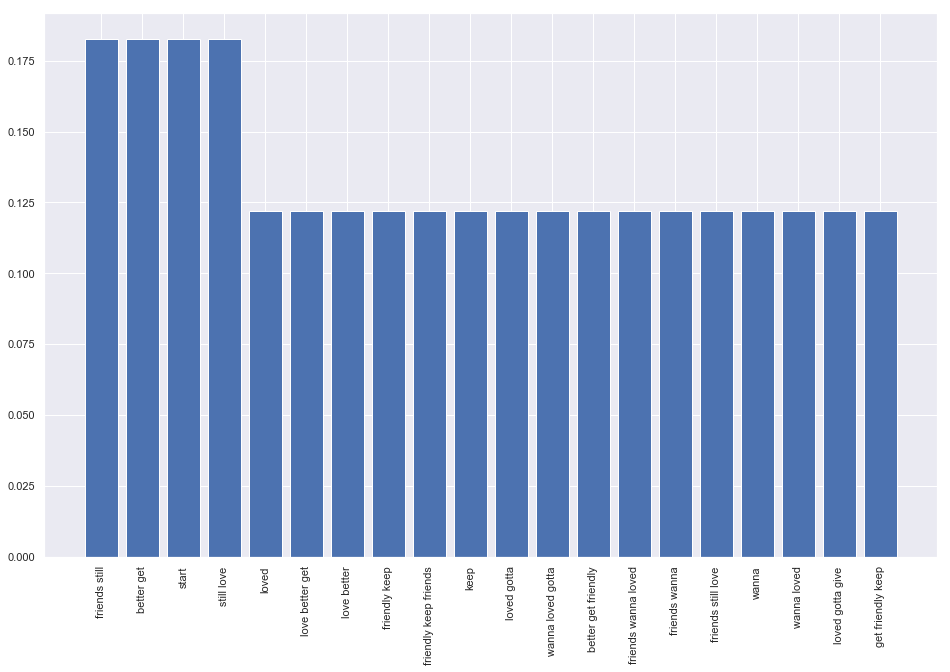

In [219]:
#Ploteo las primera x palabras
plt.bar(palabras[posicion_compo][:20],compo[posicion_compo][:20])
a = plt.xticks(rotation="vertical")